In [1]:
import numpy as np
import torch
from torch import nn as nn
from torch import optim as optim

from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

from torch.utils.data.dataset import random_split

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

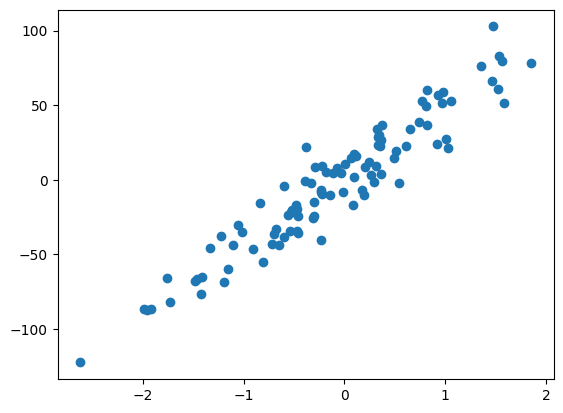

In [3]:
np.random.seed(42)
X, y = make_regression(n_features=1, noise=15)
y = y.reshape(-1,1)
plt.scatter(X,y)

In [4]:
# removing train test split from sklearn and using pytorch random split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
# X_train = torch.tensor(X_train)
# X_test = torch.tensor(X_test)
# y_train = torch.tensor(y_train)
# y_test = torch.tensor(y_test)

# y_train = y_train.reshape(-1,1)

In [6]:
X = torch.tensor(X)
y = torch.tensor(y)

In [7]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

    def __len__(self):
        return len(self.X)


dataset = MyDataset(X, y)

In [8]:
# spliting data using pytorch randon_split
ratio = 0.80
n_total = len(dataset)
n_train = int(n_total * ratio)
n_val = n_total - n_train
train_data, val_data = random_split(dataset, [n_train, n_val]) 

In [9]:
# data_loader = DataLoader(dataset=training_data, batch_size=32, shuffle=True)
# next(iter(data_loader))

In [10]:
# data loader for train and validation set

train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=val_data, batch_size=32) # no need to shuffle for validation

In [11]:

class MyModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1,1)
        self.double()

    def forward(self, X):
        return self.fc(X)

EPOCHS = 30

lr = 0.1

model = MyModel()

optimizer = optim.SGD(model.parameters(), lr=lr)

mse = nn.MSELoss()

losses = []
val_losses = []

for i in range(EPOCHS): 

    mini_batch_loss = []
    mini_batch_val_loss = []

    for X_batch, y_batch in train_loader:

        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # for training
        model.train()
        y_pred = model(X_batch)
        loss = mse(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # training loss
        mini_batch_loss.append(loss)
        

        # for evaluation
        with torch.no_grad():
            for X_batch, y_batch in test_loader:

                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                
                model.eval()
                y_pred = model(X_batch)
                loss = mse(y_pred, y_batch)
                # validation loss
                mini_batch_val_loss.append(loss)

    losses.append(torch.tensor(mini_batch_loss).mean())
    val_losses.append(torch.tensor(mini_batch_val_loss).mean())
    

        

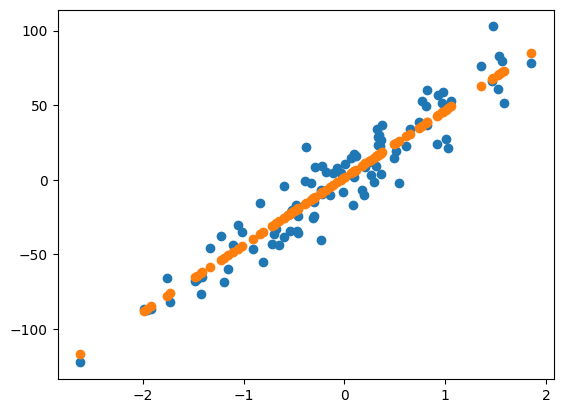

In [12]:
n_pred = model(X)
plt.scatter(X, y)
plt.scatter(X, n_pred.detach().numpy())


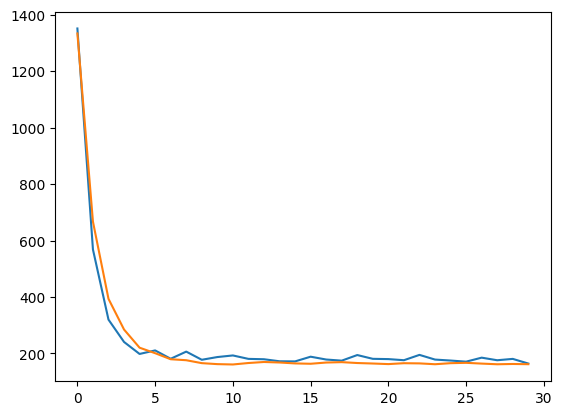

In [13]:
plt.plot(np.arange(30),losses)
plt.plot(np.arange(30),val_losses)
